### gather and format data

In [154]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors_1.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('Flow_1.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189


In [155]:
flow.head()

,Flow
0,23.876163
1,25.924320
2,24.970956
3,24.909395
4,24.410650


In [156]:
def movingAvg(Class, windowSize):
    """
    Create moving average to remove single outliers

    Args:
        Class (list): List of inhale / exhale classes
        Windowsize (int): Size of moving average window

    Returns:
        filteredClass (list): Filtered list of classes
    """
    
    filteredClass = []
    for i in range(0, len(Class)):

        if i < windowSize - 1:
            filteredClass.append(Class[i])

        elif Class[i] != Class[i - 1]:
            if sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize > 1:
                filteredClass.append(2)

            elif sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize < 1:
                filteredClass.append(0)

            else:
                filteredClass.append(Class[i])

        elif Class[i] == Class[i - 1]:
            filteredClass.append(Class[i])
            
    return filteredClass

def classSwitch(Class):
    """
    Class switch function to filter 3 classifiers down to 2 (inhale and exhale)

    Args:
        Class (list): List of inhale / exhale classes

    Returns:
        decisionClass (list): Filtered (with moving average) of resulting simplified class
    """

    decision = []
    for i in range(0, len(Class)):
        
        if Class[i] == 1:
            decision.append(1)
            
        elif Class[i] == 0:
            decision.append(0)
            
        elif Class[i] == 2:
            if len(decision) > 1:
                decision.append(decision[-1])
            else:
                decision.append(2)
            
    return movingAvg(decision, 3)

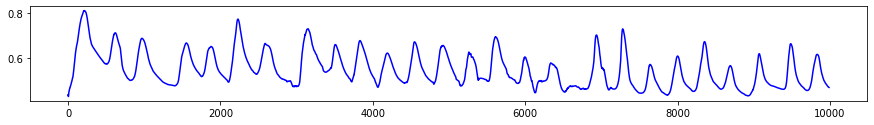

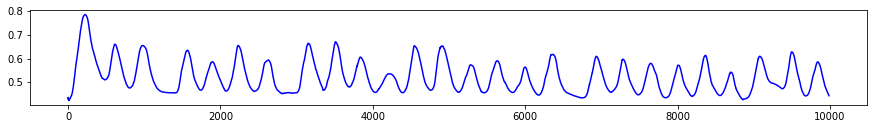

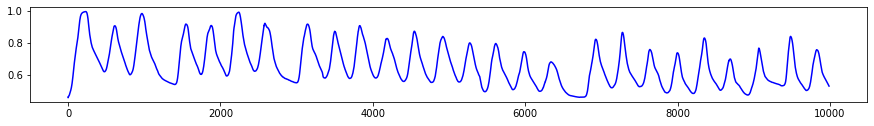

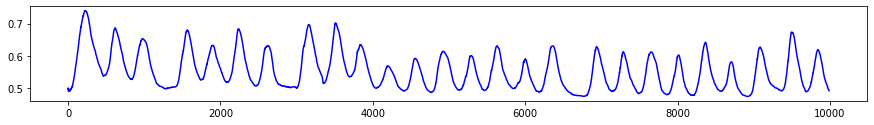

In [157]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

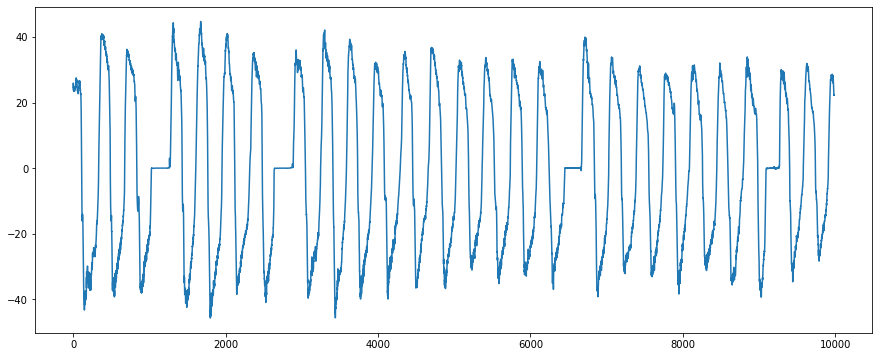

In [158]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow['Flow'])

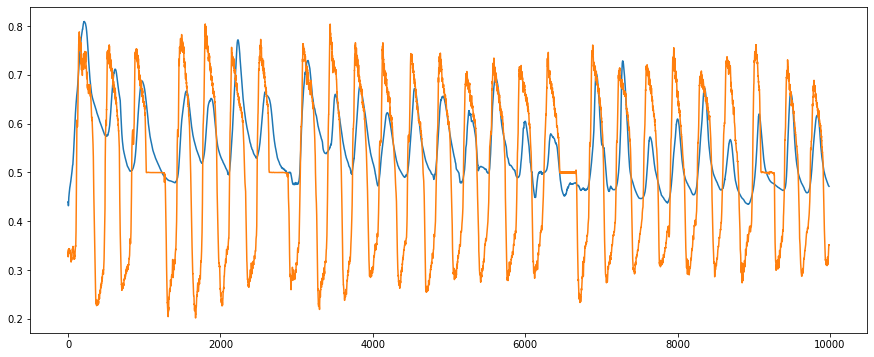

In [159]:
flow['a'] = (flow['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (15, 6))
plt.plot(x, df['1'], x, flow['a']*-1)

In [160]:
flow.drop('a', inplace = True, axis = 1)

In [161]:
def label_fix(label):
    if label < -18:
        return 0
    elif label > 18:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [162]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422,1
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668,1
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535,1
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387,1
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189,1


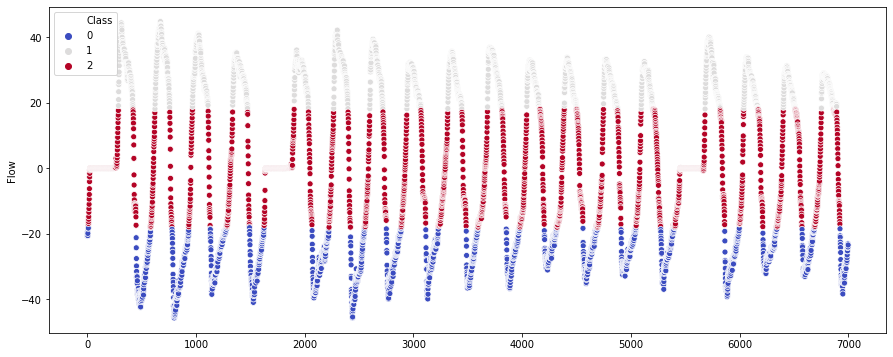

In [163]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

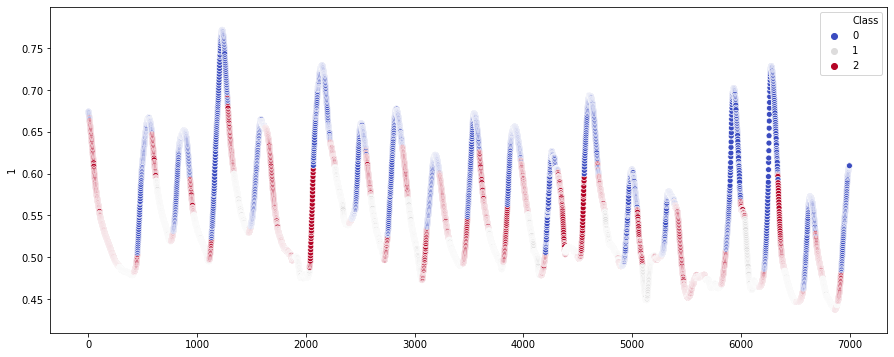

In [164]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [165]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422,1
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668,1
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535,1
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387,1
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189,1


In [166]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [167]:
len(X)

9989

### model training - deep learning

In [168]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(125, activation = tf.nn.relu))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [169]:
EPOCHS = 10000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/10000
6992/6992 [==============================] - 1s 75us/sample - loss: 0.7875 - acc: 0.6244
Epoch 2/10000
6992/6992 [==============================] - 0s 53us/sample - loss: 0.5908 - acc: 0.7300
Epoch 3/10000
6992/6992 [==============================] - 0s 54us/sample - loss: 0.5670 - acc: 0.7403
Epoch 4/10000
6992/6992 [==============================] - 0s 55us/sample - loss: 0.5460 - acc: 0.7461
Epoch 5/10000
6992/6992 [==============================] - 0s 52us/sample - loss: 0.5360 - acc: 0.7489
Epoch 6/10000
6992/6992 [==============================] - 0s 54us/sample - loss: 0.5219 - acc: 0.7513
Epoch 7/10000
6992/6992 [==============================] - 0s 52us/sample - loss: 0.5038 - acc: 0.7636
Epoch 8/10000
6992/6992 [==============================] - 0s 52us/sample - loss: 0.4926 - acc: 0.7662
Epoch 9/10000
6992/6992 [==============================] - 0s 53us/sample - loss: 0.4878 - acc: 0.7749
Epoch 10/10000
6992/6992 [==============================] - 0s 51us/sampl

6992/6992 [==============================] - 0s 51us/sample - loss: 0.2203 - acc: 0.9083
Epoch 80/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.2190 - acc: 0.9083
Epoch 81/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.2127 - acc: 0.9135
Epoch 82/10000
6992/6992 [==============================] - 0s 52us/sample - loss: 0.2121 - acc: 0.9083
Epoch 83/10000
6992/6992 [==============================] - 0s 51us/sample - loss: 0.2103 - acc: 0.9120
Epoch 84/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.2074 - acc: 0.9156
Epoch 85/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.2012 - acc: 0.9152
Epoch 86/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.1996 - acc: 0.9199
Epoch 87/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.2024 - acc: 0.9155
Epoch 88/10000
6992/6992 [==============================] - 0s 48us/sample - lo

6992/6992 [==============================] - 0s 49us/sample - loss: 0.1511 - acc: 0.9352
Epoch 158/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.1280 - acc: 0.9492
Epoch 159/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.1079 - acc: 0.9600
Epoch 160/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.1164 - acc: 0.9538
Epoch 161/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.1238 - acc: 0.9501
Epoch 162/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.1143 - acc: 0.9541
Epoch 163/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.1353 - acc: 0.9479
Epoch 164/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.1214 - acc: 0.9507
Epoch 165/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.1208 - acc: 0.9521
Epoch 166/10000
6992/6992 [==============================] - 0s 49us/sa

6992/6992 [==============================] - 0s 49us/sample - loss: 0.0845 - acc: 0.9667
Epoch 236/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0963 - acc: 0.9608
Epoch 237/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0966 - acc: 0.9621
Epoch 238/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0834 - acc: 0.9687
Epoch 239/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.1048 - acc: 0.9595
Epoch 240/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0922 - acc: 0.9630
Epoch 241/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0845 - acc: 0.9658
Epoch 242/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0827 - acc: 0.9664
Epoch 243/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0851 - acc: 0.9671
Epoch 244/10000
6992/6992 [==============================] - 0s 49us/sa

6992/6992 [==============================] - 0s 51us/sample - loss: 0.0758 - acc: 0.9704
Epoch 314/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0850 - acc: 0.9662
Epoch 315/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0688 - acc: 0.9723
Epoch 316/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0734 - acc: 0.9715
Epoch 317/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0871 - acc: 0.9632
Epoch 318/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0763 - acc: 0.9707
Epoch 319/10000
6992/6992 [==============================] - 0s 51us/sample - loss: 0.0676 - acc: 0.9740
Epoch 320/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0799 - acc: 0.9662
Epoch 321/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0755 - acc: 0.9691
Epoch 322/10000
6992/6992 [==============================] - 0s 48us/sa

6992/6992 [==============================] - 0s 49us/sample - loss: 0.0732 - acc: 0.9710
Epoch 392/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0746 - acc: 0.9691
Epoch 393/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0618 - acc: 0.9763
Epoch 394/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0670 - acc: 0.9753
Epoch 395/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0670 - acc: 0.9727
Epoch 396/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0705 - acc: 0.9733
Epoch 397/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0592 - acc: 0.9763
Epoch 398/10000
6992/6992 [==============================] - 0s 51us/sample - loss: 0.0696 - acc: 0.9711
Epoch 399/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0546 - acc: 0.9791
Epoch 400/10000
6992/6992 [==============================] - 0s 50us/sa

6992/6992 [==============================] - 0s 50us/sample - loss: 0.0534 - acc: 0.9773
Epoch 470/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0539 - acc: 0.9784
Epoch 471/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0731 - acc: 0.9708
Epoch 472/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0720 - acc: 0.9721
Epoch 473/10000
6992/6992 [==============================] - 0s 48us/sample - loss: 0.0554 - acc: 0.9788
Epoch 474/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0560 - acc: 0.9778
Epoch 475/10000
6992/6992 [==============================] - 0s 51us/sample - loss: 0.0498 - acc: 0.9783
Epoch 476/10000
6992/6992 [==============================] - 0s 49us/sample - loss: 0.0669 - acc: 0.9735
Epoch 477/10000
6992/6992 [==============================] - 0s 50us/sample - loss: 0.0623 - acc: 0.9751
Epoch 478/10000
6992/6992 [==============================] - 0s 49us/sa

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0580 - acc: 0.9774
Epoch 548/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0502 - acc: 0.9793
Epoch 549/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0678 - acc: 0.9721
Epoch 550/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0570 - acc: 0.9761
Epoch 551/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0555 - acc: 0.9784
Epoch 552/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0517 - acc: 0.9791
Epoch 553/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0557 - acc: 0.9770
Epoch 554/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0569 - acc: 0.9777
Epoch 555/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0550 - acc: 0.9788
Epoch 556/10000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0572 - acc: 0.9755
Epoch 626/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0586 - acc: 0.9751
Epoch 627/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0595 - acc: 0.9800
Epoch 628/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0497 - acc: 0.9813
Epoch 629/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0479 - acc: 0.9817
Epoch 630/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0567 - acc: 0.9764
Epoch 631/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0531 - acc: 0.9777
Epoch 632/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0460 - acc: 0.9814
Epoch 633/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0511 - acc: 0.9774
Epoch 634/10000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0549 - acc: 0.9780
Epoch 704/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0436 - acc: 0.9823
Epoch 705/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0539 - acc: 0.9800
Epoch 706/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0530 - acc: 0.9774
Epoch 707/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0502 - acc: 0.9798
Epoch 708/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0503 - acc: 0.9805
Epoch 709/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0522 - acc: 0.9798
Epoch 710/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0535 - acc: 0.9775
Epoch 711/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0499 - acc: 0.9794
Epoch 712/10000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0533 - acc: 0.9771
Epoch 782/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0490 - acc: 0.9795
Epoch 783/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0473 - acc: 0.9816
Epoch 784/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0503 - acc: 0.9804
Epoch 785/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0502 - acc: 0.9778
Epoch 786/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0545 - acc: 0.9780
Epoch 787/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0446 - acc: 0.9821
Epoch 788/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0449 - acc: 0.9820
Epoch 789/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0460 - acc: 0.9816
Epoch 790/10000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0543 - acc: 0.9797
Epoch 860/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0430 - acc: 0.9830
Epoch 861/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0488 - acc: 0.9810
Epoch 862/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0537 - acc: 0.9790
Epoch 863/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0454 - acc: 0.9818
Epoch 864/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0420 - acc: 0.9834
Epoch 865/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0449 - acc: 0.9820
Epoch 866/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0405 - acc: 0.9841
Epoch 867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0435 - acc: 0.9823
Epoch 868/10000
6992/6992 [==============================] - 0s 21us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0465 - acc: 0.9804
Epoch 938/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0416 - acc: 0.9821
Epoch 939/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0566 - acc: 0.9777
Epoch 940/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0402 - acc: 0.9840
Epoch 941/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0371 - acc: 0.9843
Epoch 942/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0443 - acc: 0.9828
Epoch 943/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0523 - acc: 0.9794
Epoch 944/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0407 - acc: 0.9837
Epoch 945/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0514 - acc: 0.9788
Epoch 946/10000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.0424 - acc: 0.9826
Epoch 1016/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0391 - acc: 0.9851
Epoch 1017/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0422 - acc: 0.9834
Epoch 1018/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0407 - acc: 0.9844
Epoch 1019/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0393 - acc: 0.9850
Epoch 1020/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0418 - acc: 0.9827
Epoch 1021/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0449 - acc: 0.9808
Epoch 1022/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0431 - acc: 0.9854
Epoch 1023/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0557 - acc: 0.9780
Epoch 1024/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0462 - acc: 0.9824
Epoch 1093/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0530 - acc: 0.9793
Epoch 1094/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0396 - acc: 0.9837
Epoch 1095/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0397 - acc: 0.9858
Epoch 1096/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0371 - acc: 0.9867
Epoch 1097/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0438 - acc: 0.9828
Epoch 1098/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0394 - acc: 0.9838
Epoch 1099/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0379 - acc: 0.9831
Epoch 1100/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0437 - acc: 0.9826
Epoch 1101/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0342 - acc: 0.9864
Epoch 1170/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0346 - acc: 0.9854
Epoch 1171/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0329 - acc: 0.9861
Epoch 1172/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0385 - acc: 0.9846
Epoch 1173/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0328 - acc: 0.9868
Epoch 1174/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0576 - acc: 0.9784
Epoch 1175/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0420 - acc: 0.9847
Epoch 1176/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0429 - acc: 0.9824
Epoch 1177/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0550 - acc: 0.9783
Epoch 1178/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0351 - acc: 0.9848
Epoch 1247/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0386 - acc: 0.9853
Epoch 1248/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0363 - acc: 0.9861
Epoch 1249/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0493 - acc: 0.9803
Epoch 1250/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0351 - acc: 0.9856
Epoch 1251/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0323 - acc: 0.9873
Epoch 1252/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0397 - acc: 0.9854
Epoch 1253/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0330 - acc: 0.9860
Epoch 1254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0404 - acc: 0.9831
Epoch 1255/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0352 - acc: 0.9840
Epoch 1324/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0380 - acc: 0.9848
Epoch 1325/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0416 - acc: 0.9827
Epoch 1326/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0356 - acc: 0.9857
Epoch 1327/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0364 - acc: 0.9843
Epoch 1328/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0402 - acc: 0.9838
Epoch 1329/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0303 - acc: 0.9878
Epoch 1330/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0364 - acc: 0.9853
Epoch 1331/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0372 - acc: 0.9871
Epoch 1332/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0299 - acc: 0.9874
Epoch 1401/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0360 - acc: 0.9870
Epoch 1402/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0388 - acc: 0.9828
Epoch 1403/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0395 - acc: 0.9841
Epoch 1404/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0320 - acc: 0.9870
Epoch 1405/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0358 - acc: 0.9846
Epoch 1406/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0385 - acc: 0.9833
Epoch 1407/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0377 - acc: 0.9847
Epoch 1408/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0364 - acc: 0.9856
Epoch 1409/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0347 - acc: 0.9877
Epoch 1478/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0324 - acc: 0.9866
Epoch 1479/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0414 - acc: 0.9837
Epoch 1480/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0361 - acc: 0.9850
Epoch 1481/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0340 - acc: 0.9854
Epoch 1482/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0323 - acc: 0.9851
Epoch 1483/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0330 - acc: 0.9861
Epoch 1484/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0320 - acc: 0.9857
Epoch 1485/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0327 - acc: 0.9870
Epoch 1486/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0335 - acc: 0.9876
Epoch 1555/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0460 - acc: 0.9828
Epoch 1556/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0354 - acc: 0.9848
Epoch 1557/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0349 - acc: 0.9857
Epoch 1558/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0352 - acc: 0.9857
Epoch 1559/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0360 - acc: 0.9846
Epoch 1560/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0335 - acc: 0.9863
Epoch 1561/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0308 - acc: 0.9876
Epoch 1562/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0295 - acc: 0.9880
Epoch 1563/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0330 - acc: 0.9854
Epoch 1632/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0330 - acc: 0.9871
Epoch 1633/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0325 - acc: 0.9871
Epoch 1634/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0353 - acc: 0.9861
Epoch 1635/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0366 - acc: 0.9850
Epoch 1636/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0362 - acc: 0.9857
Epoch 1637/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0401 - acc: 0.9851
Epoch 1638/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0332 - acc: 0.9857
Epoch 1639/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0315 - acc: 0.9870
Epoch 1640/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0363 - acc: 0.9840
Epoch 1709/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0318 - acc: 0.9876
Epoch 1710/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0290 - acc: 0.9868
Epoch 1711/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0336 - acc: 0.9854
Epoch 1712/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0277 - acc: 0.9878
Epoch 1713/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0342 - acc: 0.9863
Epoch 1714/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0318 - acc: 0.9857
Epoch 1715/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0362 - acc: 0.9847
Epoch 1716/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0400 - acc: 0.9846
Epoch 1717/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0288 - acc: 0.9890
Epoch 1786/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0332 - acc: 0.9868
Epoch 1787/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0388 - acc: 0.9846
Epoch 1788/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0334 - acc: 0.9858
Epoch 1789/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0346 - acc: 0.9864
Epoch 1790/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0387 - acc: 0.9856
Epoch 1791/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0325 - acc: 0.9853
Epoch 1792/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0309 - acc: 0.9878
Epoch 1793/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0348 - acc: 0.9867
Epoch 1794/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0331 - acc: 0.9867
Epoch 1863/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0323 - acc: 0.9861
Epoch 1864/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0277 - acc: 0.9880
Epoch 1865/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0288 - acc: 0.9881
Epoch 1866/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0265 - acc: 0.9891
Epoch 1867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0312 - acc: 0.9877
Epoch 1868/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0310 - acc: 0.9866
Epoch 1869/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0324 - acc: 0.9877
Epoch 1870/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0372 - acc: 0.9833
Epoch 1871/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0326 - acc: 0.9854
Epoch 1940/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0309 - acc: 0.9860
Epoch 1941/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0303 - acc: 0.9867
Epoch 1942/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0273 - acc: 0.9891
Epoch 1943/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0286 - acc: 0.9868
Epoch 1944/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0272 - acc: 0.9896
Epoch 1945/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0295 - acc: 0.9880
Epoch 1946/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0253 - acc: 0.9903
Epoch 1947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0522 - acc: 0.9803
Epoch 1948/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0343 - acc: 0.9861
Epoch 2017/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0289 - acc: 0.9876
Epoch 2018/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0313 - acc: 0.9873
Epoch 2019/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0337 - acc: 0.9846
Epoch 2020/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0321 - acc: 0.9874
Epoch 2021/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0286 - acc: 0.9880
Epoch 2022/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0277 - acc: 0.9894
Epoch 2023/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0300 - acc: 0.9877
Epoch 2024/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0331 - acc: 0.9867
Epoch 2025/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0279 - acc: 0.9884
Epoch 2094/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0307 - acc: 0.9867
Epoch 2095/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0283 - acc: 0.9870
Epoch 2096/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0335 - acc: 0.9876
Epoch 2097/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0263 - acc: 0.9894
Epoch 2098/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0319 - acc: 0.9866
Epoch 2099/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0297 - acc: 0.9880
Epoch 2100/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0330 - acc: 0.9858
Epoch 2101/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0254 - acc: 0.9890
Epoch 2102/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0368 - acc: 0.9850
Epoch 2171/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0268 - acc: 0.9901
Epoch 2172/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0291 - acc: 0.9883
Epoch 2173/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0367 - acc: 0.9857
Epoch 2174/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0248 - acc: 0.9903
Epoch 2175/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0305 - acc: 0.9867
Epoch 2176/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0255 - acc: 0.9887
Epoch 2177/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0271 - acc: 0.9890
Epoch 2178/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0370 - acc: 0.9854
Epoch 2179/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0341 - acc: 0.9867
Epoch 2248/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0312 - acc: 0.9864
Epoch 2249/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0321 - acc: 0.9857
Epoch 2250/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0284 - acc: 0.9883
Epoch 2251/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0316 - acc: 0.9856
Epoch 2252/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0238 - acc: 0.9910
Epoch 2253/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0245 - acc: 0.9888
Epoch 2254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0302 - acc: 0.9878
Epoch 2255/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0292 - acc: 0.9886
Epoch 2256/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0279 - acc: 0.9884
Epoch 2325/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0278 - acc: 0.9884
Epoch 2326/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0282 - acc: 0.9884
Epoch 2327/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0404 - acc: 0.9854
Epoch 2328/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0302 - acc: 0.9886
Epoch 2329/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0280 - acc: 0.9886
Epoch 2330/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0236 - acc: 0.9903
Epoch 2331/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0247 - acc: 0.9900
Epoch 2332/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0270 - acc: 0.9888
Epoch 2333/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0323 - acc: 0.9864
Epoch 2402/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0252 - acc: 0.9887
Epoch 2403/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0281 - acc: 0.9878
Epoch 2404/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0267 - acc: 0.9891
Epoch 2405/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0285 - acc: 0.9883
Epoch 2406/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0251 - acc: 0.9883
Epoch 2407/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0260 - acc: 0.9881
Epoch 2408/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0298 - acc: 0.9877
Epoch 2409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0250 - acc: 0.9888
Epoch 2410/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0276 - acc: 0.9884
Epoch 2479/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0274 - acc: 0.9881
Epoch 2480/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0242 - acc: 0.9896
Epoch 2481/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0249 - acc: 0.9904
Epoch 2482/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0294 - acc: 0.9880
Epoch 2483/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0344 - acc: 0.9861
Epoch 2484/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0322 - acc: 0.9871
Epoch 2485/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0249 - acc: 0.9897
Epoch 2486/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0351 - acc: 0.9854
Epoch 2487/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0214 - acc: 0.9906
Epoch 2556/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0303 - acc: 0.9863
Epoch 2557/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0275 - acc: 0.9880
Epoch 2558/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0253 - acc: 0.9888
Epoch 2559/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0238 - acc: 0.9901
Epoch 2560/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0233 - acc: 0.9907
Epoch 2561/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0303 - acc: 0.9876
Epoch 2562/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0299 - acc: 0.9883
Epoch 2563/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0297 - acc: 0.9881
Epoch 2564/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0340 - acc: 0.9847
Epoch 2633/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0269 - acc: 0.9880
Epoch 2634/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0279 - acc: 0.9893
Epoch 2635/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0204 - acc: 0.9901
Epoch 2636/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0273 - acc: 0.9871
Epoch 2637/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0284 - acc: 0.9886
Epoch 2638/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0266 - acc: 0.9891
Epoch 2639/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0255 - acc: 0.9897
Epoch 2640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0324 - acc: 0.9868
Epoch 2641/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0280 - acc: 0.9896
Epoch 2710/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0333 - acc: 0.9863
Epoch 2711/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0249 - acc: 0.9890
Epoch 2712/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0363 - acc: 0.9854
Epoch 2713/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0335 - acc: 0.9858
Epoch 2714/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0272 - acc: 0.9881
Epoch 2715/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0241 - acc: 0.9903
Epoch 2716/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0232 - acc: 0.9884
Epoch 2717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0309 - acc: 0.9867
Epoch 2718/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0228 - acc: 0.9903
Epoch 2787/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0263 - acc: 0.9896
Epoch 2788/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0281 - acc: 0.9894
Epoch 2789/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0209 - acc: 0.9907
Epoch 2790/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0242 - acc: 0.9911
Epoch 2791/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0330 - acc: 0.9864
Epoch 2792/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0265 - acc: 0.9894
Epoch 2793/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0263 - acc: 0.9883
Epoch 2794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0207 - acc: 0.9920
Epoch 2795/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0272 - acc: 0.9880
Epoch 2864/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0271 - acc: 0.9888
Epoch 2865/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0259 - acc: 0.9891
Epoch 2866/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0277 - acc: 0.9884
Epoch 2867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0284 - acc: 0.9886
Epoch 2868/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0234 - acc: 0.9896
Epoch 2869/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0291 - acc: 0.9886
Epoch 2870/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0213 - acc: 0.9904
Epoch 2871/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0264 - acc: 0.9890
Epoch 2872/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0214 - acc: 0.9907
Epoch 2941/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0301 - acc: 0.9871
Epoch 2942/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0218 - acc: 0.9908
Epoch 2943/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0271 - acc: 0.9886
Epoch 2944/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0209 - acc: 0.9911
Epoch 2945/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0247 - acc: 0.9901
Epoch 2946/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0289 - acc: 0.9886
Epoch 2947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0211 - acc: 0.9910
Epoch 2948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0242 - acc: 0.9896
Epoch 2949/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0221 - acc: 0.9910
Epoch 3018/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0288 - acc: 0.9868
Epoch 3019/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0258 - acc: 0.9883
Epoch 3020/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0205 - acc: 0.9911
Epoch 3021/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0237 - acc: 0.9896
Epoch 3022/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0235 - acc: 0.9894
Epoch 3023/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0227 - acc: 0.9893
Epoch 3024/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0243 - acc: 0.9906
Epoch 3025/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0270 - acc: 0.9891
Epoch 3026/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0264 - acc: 0.9887
Epoch 3095/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0211 - acc: 0.9917
Epoch 3096/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0274 - acc: 0.9871
Epoch 3097/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0196 - acc: 0.9904
Epoch 3098/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0277 - acc: 0.9888
Epoch 3099/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0230 - acc: 0.9894
Epoch 3100/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0239 - acc: 0.9884
Epoch 3101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0303 - acc: 0.9890
Epoch 3102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0269 - acc: 0.9886
Epoch 3103/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0239 - acc: 0.9896
Epoch 3172/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0234 - acc: 0.9907
Epoch 3173/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0236 - acc: 0.9907
Epoch 3174/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0245 - acc: 0.9898
Epoch 3175/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0278 - acc: 0.9901
Epoch 3176/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0245 - acc: 0.9878
Epoch 3177/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0247 - acc: 0.9893
Epoch 3178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0220 - acc: 0.9917
Epoch 3179/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0247 - acc: 0.9888
Epoch 3180/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0248 - acc: 0.9896
Epoch 3249/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0277 - acc: 0.9884
Epoch 3250/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0226 - acc: 0.9900
Epoch 3251/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0224 - acc: 0.9903
Epoch 3252/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0218 - acc: 0.9908
Epoch 3253/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0204 - acc: 0.9903
Epoch 3254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0269 - acc: 0.9883
Epoch 3255/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0252 - acc: 0.9897
Epoch 3256/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0207 - acc: 0.9914
Epoch 3257/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0206 - acc: 0.9920
Epoch 3326/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0287 - acc: 0.9891
Epoch 3327/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0244 - acc: 0.9903
Epoch 3328/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0246 - acc: 0.9896
Epoch 3329/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0225 - acc: 0.9907
Epoch 3330/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0248 - acc: 0.9888
Epoch 3331/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0263 - acc: 0.9876
Epoch 3332/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0261 - acc: 0.9888
Epoch 3333/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0253 - acc: 0.9900
Epoch 3334/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0207 - acc: 0.9908
Epoch 3403/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0259 - acc: 0.9904
Epoch 3404/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0287 - acc: 0.9880
Epoch 3405/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0255 - acc: 0.9896
Epoch 3406/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0172 - acc: 0.9924
Epoch 3407/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0252 - acc: 0.9900
Epoch 3408/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0279 - acc: 0.9891
Epoch 3409/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0237 - acc: 0.9893
Epoch 3410/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0293 - acc: 0.9888
Epoch 3411/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0192 - acc: 0.9918
Epoch 3480/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0246 - acc: 0.9896
Epoch 3481/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0202 - acc: 0.9911
Epoch 3482/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0213 - acc: 0.9900
Epoch 3483/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0269 - acc: 0.9884
Epoch 3484/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0224 - acc: 0.9897
Epoch 3485/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0201 - acc: 0.9904
Epoch 3486/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0227 - acc: 0.9906
Epoch 3487/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0227 - acc: 0.9898
Epoch 3488/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0209 - acc: 0.9916
Epoch 3557/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0246 - acc: 0.9904
Epoch 3558/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0191 - acc: 0.9917
Epoch 3559/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0233 - acc: 0.9907
Epoch 3560/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0237 - acc: 0.9888
Epoch 3561/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0226 - acc: 0.9896
Epoch 3562/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0232 - acc: 0.9894
Epoch 3563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0228 - acc: 0.9911
Epoch 3564/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0321 - acc: 0.9880
Epoch 3565/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0265 - acc: 0.9890
Epoch 3634/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0204 - acc: 0.9914
Epoch 3635/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0223 - acc: 0.9897
Epoch 3636/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0230 - acc: 0.9901
Epoch 3637/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9926
Epoch 3638/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0259 - acc: 0.9897
Epoch 3639/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0191 - acc: 0.9921
Epoch 3640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0209 - acc: 0.9901
Epoch 3641/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0181 - acc: 0.9917
Epoch 3642/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0240 - acc: 0.9896
Epoch 3711/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0291 - acc: 0.9888
Epoch 3712/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0225 - acc: 0.9904
Epoch 3713/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0201 - acc: 0.9910
Epoch 3714/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0173 - acc: 0.9927
Epoch 3715/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0219 - acc: 0.9910
Epoch 3716/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0246 - acc: 0.9898
Epoch 3717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0334 - acc: 0.9876
Epoch 3718/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0224 - acc: 0.9907
Epoch 3719/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0205 - acc: 0.9910
Epoch 3788/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0268 - acc: 0.9901
Epoch 3789/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0216 - acc: 0.9893
Epoch 3790/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0255 - acc: 0.9883
Epoch 3791/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0213 - acc: 0.9907
Epoch 3792/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0243 - acc: 0.9906
Epoch 3793/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0308 - acc: 0.9880
Epoch 3794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9928
Epoch 3795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0185 - acc: 0.9927
Epoch 3796/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0220 - acc: 0.9900
Epoch 3865/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0231 - acc: 0.9907
Epoch 3866/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0508 - acc: 0.9816
Epoch 3867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9914
Epoch 3868/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9923
Epoch 3869/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0221 - acc: 0.9906
Epoch 3870/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0192 - acc: 0.9904
Epoch 3871/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0239 - acc: 0.9908
Epoch 3872/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0294 - acc: 0.9884
Epoch 3873/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0218 - acc: 0.9903
Epoch 3942/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0230 - acc: 0.9898
Epoch 3943/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0207 - acc: 0.9893
Epoch 3944/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0240 - acc: 0.9894
Epoch 3945/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9933
Epoch 3946/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0224 - acc: 0.9907
Epoch 3947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0221 - acc: 0.9910
Epoch 3948/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0205 - acc: 0.9903
Epoch 3949/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0202 - acc: 0.9918
Epoch 3950/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0240 - acc: 0.9883
Epoch 4019/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0209 - acc: 0.9908
Epoch 4020/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0182 - acc: 0.9923
Epoch 4021/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0186 - acc: 0.9920
Epoch 4022/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0150 - acc: 0.9928
Epoch 4023/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0236 - acc: 0.9894
Epoch 4024/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0207 - acc: 0.9904
Epoch 4025/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0156 - acc: 0.9936
Epoch 4026/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0226 - acc: 0.9907
Epoch 4027/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 21us/sample - loss: 0.0208 - acc: 0.9900
Epoch 4096/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0197 - acc: 0.9911
Epoch 4097/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0256 - acc: 0.9888
Epoch 4098/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0184 - acc: 0.9916
Epoch 4099/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0177 - acc: 0.9930
Epoch 4100/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0222 - acc: 0.9914
Epoch 4101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0219 - acc: 0.9917
Epoch 4102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0195 - acc: 0.9916
Epoch 4103/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0226 - acc: 0.9897
Epoch 4104/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0232 - acc: 0.9898
Epoch 4173/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0271 - acc: 0.9877
Epoch 4174/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0177 - acc: 0.9924
Epoch 4175/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0212 - acc: 0.9906
Epoch 4176/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0216 - acc: 0.9904
Epoch 4177/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0274 - acc: 0.9878
Epoch 4178/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0227 - acc: 0.9916
Epoch 4179/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0192 - acc: 0.9923
Epoch 4180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0181 - acc: 0.9927
Epoch 4181/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0226 - acc: 0.9913
Epoch 4250/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0208 - acc: 0.9911
Epoch 4251/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0198 - acc: 0.9913
Epoch 4252/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0244 - acc: 0.9897
Epoch 4253/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0298 - acc: 0.9870
Epoch 4254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0219 - acc: 0.9907
Epoch 4255/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0181 - acc: 0.9927
Epoch 4256/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0218 - acc: 0.9910
Epoch 4257/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0199 - acc: 0.9913
Epoch 4258/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0192 - acc: 0.9924
Epoch 4327/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0187 - acc: 0.9924
Epoch 4328/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0198 - acc: 0.9907
Epoch 4329/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0167 - acc: 0.9930
Epoch 4330/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0204 - acc: 0.9907
Epoch 4331/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0177 - acc: 0.9927
Epoch 4332/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0202 - acc: 0.9916
Epoch 4333/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0242 - acc: 0.9890
Epoch 4334/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0215 - acc: 0.9900
Epoch 4335/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0195 - acc: 0.9916
Epoch 4404/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0212 - acc: 0.9923
Epoch 4405/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0206 - acc: 0.9913
Epoch 4406/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0190 - acc: 0.9916
Epoch 4407/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0187 - acc: 0.9924
Epoch 4408/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0184 - acc: 0.9910
Epoch 4409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0239 - acc: 0.9901
Epoch 4410/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0220 - acc: 0.9920
Epoch 4411/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0229 - acc: 0.9898
Epoch 4412/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0272 - acc: 0.9884
Epoch 4481/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0192 - acc: 0.9911
Epoch 4482/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0183 - acc: 0.9926
Epoch 4483/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9937
Epoch 4484/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0164 - acc: 0.9936
Epoch 4485/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0193 - acc: 0.9904
Epoch 4486/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0210 - acc: 0.9903
Epoch 4487/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0203 - acc: 0.9906
Epoch 4488/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0222 - acc: 0.9900
Epoch 4489/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0181 - acc: 0.9918
Epoch 4558/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0138 - acc: 0.9933
Epoch 4559/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0187 - acc: 0.9924
Epoch 4560/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0195 - acc: 0.9908
Epoch 4561/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0218 - acc: 0.9911
Epoch 4562/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0267 - acc: 0.9900
Epoch 4563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0234 - acc: 0.9906
Epoch 4564/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0203 - acc: 0.9908
Epoch 4565/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0170 - acc: 0.9928
Epoch 4566/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0175 - acc: 0.9918
Epoch 4635/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0147 - acc: 0.9937
Epoch 4636/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0177 - acc: 0.9923
Epoch 4637/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0198 - acc: 0.9926
Epoch 4638/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9928
Epoch 4639/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0195 - acc: 0.9921
Epoch 4640/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0252 - acc: 0.9903
Epoch 4641/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0191 - acc: 0.9914
Epoch 4642/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0209 - acc: 0.9914
Epoch 4643/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0206 - acc: 0.9921
Epoch 4712/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0159 - acc: 0.9928
Epoch 4713/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9920
Epoch 4714/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0214 - acc: 0.9914
Epoch 4715/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0184 - acc: 0.9918
Epoch 4716/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0201 - acc: 0.9924
Epoch 4717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0275 - acc: 0.9893
Epoch 4718/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0170 - acc: 0.9924
Epoch 4719/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0174 - acc: 0.9921
Epoch 4720/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9934
Epoch 4789/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0235 - acc: 0.9898
Epoch 4790/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9921
Epoch 4791/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0232 - acc: 0.9898
Epoch 4792/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0184 - acc: 0.9923
Epoch 4793/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0240 - acc: 0.9896
Epoch 4794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0190 - acc: 0.9914
Epoch 4795/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0216 - acc: 0.9910
Epoch 4796/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0180 - acc: 0.9923
Epoch 4797/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9917
Epoch 4866/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9903
Epoch 4867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0201 - acc: 0.9910
Epoch 4868/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0171 - acc: 0.9923
Epoch 4869/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0186 - acc: 0.9921
Epoch 4870/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0281 - acc: 0.9906
Epoch 4871/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0169 - acc: 0.9930
Epoch 4872/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0164 - acc: 0.9926
Epoch 4873/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0218 - acc: 0.9917
Epoch 4874/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9920
Epoch 4943/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0181 - acc: 0.9921
Epoch 4944/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0208 - acc: 0.9904
Epoch 4945/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0189 - acc: 0.9908
Epoch 4946/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0156 - acc: 0.9928
Epoch 4947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0266 - acc: 0.9903
Epoch 4948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0219 - acc: 0.9908
Epoch 4949/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0176 - acc: 0.9931
Epoch 4950/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0186 - acc: 0.9917
Epoch 4951/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0156 - acc: 0.9931
Epoch 5020/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0137 - acc: 0.9939
Epoch 5021/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0199 - acc: 0.9911
Epoch 5022/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0259 - acc: 0.9906
Epoch 5023/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0246 - acc: 0.9900
Epoch 5024/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9923
Epoch 5025/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0197 - acc: 0.9924
Epoch 5026/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0182 - acc: 0.9927
Epoch 5027/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0178 - acc: 0.9924
Epoch 5028/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0160 - acc: 0.9926
Epoch 5097/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0187 - acc: 0.9926
Epoch 5098/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0214 - acc: 0.9916
Epoch 5099/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0198 - acc: 0.9916
Epoch 5100/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0163 - acc: 0.9928
Epoch 5101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0175 - acc: 0.9923
Epoch 5102/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0177 - acc: 0.9916
Epoch 5103/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0166 - acc: 0.9924
Epoch 5104/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0228 - acc: 0.9894
Epoch 5105/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 25us/sample - loss: 0.0156 - acc: 0.9936
Epoch 5174/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0217 - acc: 0.9911
Epoch 5175/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0215 - acc: 0.9910
Epoch 5176/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0181 - acc: 0.9914
Epoch 5177/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0178 - acc: 0.9928
Epoch 5178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9921
Epoch 5179/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0269 - acc: 0.9904
Epoch 5180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0186 - acc: 0.9911
Epoch 5181/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0162 - acc: 0.9926
Epoch 5182/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0279 - acc: 0.9893
Epoch 5251/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0176 - acc: 0.9927
Epoch 5252/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0149 - acc: 0.9934
Epoch 5253/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0151 - acc: 0.9930
Epoch 5254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0210 - acc: 0.9907
Epoch 5255/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0146 - acc: 0.9939
Epoch 5256/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9930
Epoch 5257/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0172 - acc: 0.9921
Epoch 5258/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9931
Epoch 5259/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0170 - acc: 0.9917
Epoch 5328/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0189 - acc: 0.9931
Epoch 5329/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0140 - acc: 0.9937
Epoch 5330/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0188 - acc: 0.9926
Epoch 5331/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0218 - acc: 0.9906
Epoch 5332/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0199 - acc: 0.9921
Epoch 5333/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0162 - acc: 0.9930
Epoch 5334/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9933
Epoch 5335/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0155 - acc: 0.9933
Epoch 5336/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9928
Epoch 5405/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0208 - acc: 0.9927
Epoch 5406/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0151 - acc: 0.9943
Epoch 5407/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0136 - acc: 0.9944
Epoch 5408/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0139 - acc: 0.9940
Epoch 5409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9930
Epoch 5410/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0163 - acc: 0.9926
Epoch 5411/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0136 - acc: 0.9939
Epoch 5412/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0183 - acc: 0.9930
Epoch 5413/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0158 - acc: 0.9921
Epoch 5482/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0206 - acc: 0.9914
Epoch 5483/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0136 - acc: 0.9941
Epoch 5484/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0194 - acc: 0.9921
Epoch 5485/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0215 - acc: 0.9918
Epoch 5486/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0189 - acc: 0.9917
Epoch 5487/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0113 - acc: 0.9951
Epoch 5488/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9916
Epoch 5489/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0164 - acc: 0.9934
Epoch 5490/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 27us/sample - loss: 0.0160 - acc: 0.9928
Epoch 5559/10000
6992/6992 [==============================] - 0s 31us/sample - loss: 0.0117 - acc: 0.9953
Epoch 5560/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0207 - acc: 0.9913
Epoch 5561/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0205 - acc: 0.9908
Epoch 5562/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0139 - acc: 0.9940
Epoch 5563/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0170 - acc: 0.9941
Epoch 5564/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0194 - acc: 0.9926
Epoch 5565/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0191 - acc: 0.9916
Epoch 5566/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0159 - acc: 0.9934
Epoch 5567/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0171 - acc: 0.9928
Epoch 5636/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9940
Epoch 5637/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0166 - acc: 0.9918
Epoch 5638/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9921
Epoch 5639/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0271 - acc: 0.9871
Epoch 5640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0158 - acc: 0.9926
Epoch 5641/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9956
Epoch 5642/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0173 - acc: 0.9933
Epoch 5643/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9936
Epoch 5644/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0216 - acc: 0.9924
Epoch 5713/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0305 - acc: 0.9886
Epoch 5714/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0267 - acc: 0.9894
Epoch 5715/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0146 - acc: 0.9940
Epoch 5716/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0125 - acc: 0.9949
Epoch 5717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0129 - acc: 0.9939
Epoch 5718/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0150 - acc: 0.9933
Epoch 5719/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9920
Epoch 5720/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0223 - acc: 0.9921
Epoch 5721/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0192 - acc: 0.9928
Epoch 5790/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0156 - acc: 0.9927
Epoch 5791/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9930
Epoch 5792/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9920
Epoch 5793/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9924
Epoch 5794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0175 - acc: 0.9924
Epoch 5795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0226 - acc: 0.9911
Epoch 5796/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0168 - acc: 0.9934
Epoch 5797/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0151 - acc: 0.9933
Epoch 5798/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0168 - acc: 0.9927
Epoch 5867/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0192 - acc: 0.9926
Epoch 5868/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9924
Epoch 5869/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0188 - acc: 0.9924
Epoch 5870/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0144 - acc: 0.9941
Epoch 5871/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0184 - acc: 0.9920
Epoch 5872/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9926
Epoch 5873/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0183 - acc: 0.9911
Epoch 5874/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0158 - acc: 0.9931
Epoch 5875/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0152 - acc: 0.9944
Epoch 5944/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0148 - acc: 0.9941
Epoch 5945/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9928
Epoch 5946/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0194 - acc: 0.9927
Epoch 5947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0117 - acc: 0.9953
Epoch 5948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0151 - acc: 0.9936
Epoch 5949/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0215 - acc: 0.9908
Epoch 5950/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0261 - acc: 0.9883
Epoch 5951/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9931
Epoch 5952/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0222 - acc: 0.9913
Epoch 6021/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0150 - acc: 0.9933
Epoch 6022/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0113 - acc: 0.9951
Epoch 6023/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9921
Epoch 6024/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0152 - acc: 0.9936
Epoch 6025/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0185 - acc: 0.9921
Epoch 6026/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9918
Epoch 6027/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9941
Epoch 6028/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9930
Epoch 6029/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0159 - acc: 0.9934
Epoch 6098/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0202 - acc: 0.9913
Epoch 6099/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9924
Epoch 6100/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0144 - acc: 0.9939
Epoch 6101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0200 - acc: 0.9916
Epoch 6102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0141 - acc: 0.9927
Epoch 6103/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0147 - acc: 0.9930
Epoch 6104/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0129 - acc: 0.9943
Epoch 6105/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0158 - acc: 0.9931
Epoch 6106/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9937
Epoch 6175/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0201 - acc: 0.9920
Epoch 6176/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0209 - acc: 0.9910
Epoch 6177/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0255 - acc: 0.9896
Epoch 6178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9943
Epoch 6179/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0197 - acc: 0.9918
Epoch 6180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9944
Epoch 6181/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9940
Epoch 6182/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0246 - acc: 0.9894
Epoch 6183/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0183 - acc: 0.9907
Epoch 6252/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9928
Epoch 6253/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9936
Epoch 6254/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0216 - acc: 0.9924
Epoch 6255/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0174 - acc: 0.9923
Epoch 6256/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0133 - acc: 0.9949
Epoch 6257/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0177 - acc: 0.9934
Epoch 6258/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9937
Epoch 6259/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0144 - acc: 0.9947
Epoch 6260/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0281 - acc: 0.9893
Epoch 6329/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0125 - acc: 0.9950
Epoch 6330/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0130 - acc: 0.9940
Epoch 6331/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9934
Epoch 6332/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0139 - acc: 0.9946
Epoch 6333/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0168 - acc: 0.9924
Epoch 6334/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0195 - acc: 0.9927
Epoch 6335/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9936
Epoch 6336/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0137 - acc: 0.9943
Epoch 6337/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9940
Epoch 6406/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0180 - acc: 0.9928
Epoch 6407/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0229 - acc: 0.9908
Epoch 6408/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0176 - acc: 0.9928
Epoch 6409/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0170 - acc: 0.9926
Epoch 6410/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0138 - acc: 0.9946
Epoch 6411/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0167 - acc: 0.9918
Epoch 6412/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0188 - acc: 0.9931
Epoch 6413/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0166 - acc: 0.9918
Epoch 6414/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9936
Epoch 6483/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0331 - acc: 0.9880
Epoch 6484/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0239 - acc: 0.9896
Epoch 6485/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0153 - acc: 0.9930
Epoch 6486/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0113 - acc: 0.9950
Epoch 6487/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0158 - acc: 0.9931
Epoch 6488/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0181 - acc: 0.9923
Epoch 6489/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0149 - acc: 0.9933
Epoch 6490/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0146 - acc: 0.9933
Epoch 6491/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0208 - acc: 0.9903
Epoch 6560/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0175 - acc: 0.9930
Epoch 6561/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9931
Epoch 6562/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0127 - acc: 0.9944
Epoch 6563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0117 - acc: 0.9951
Epoch 6564/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0144 - acc: 0.9944
Epoch 6565/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0167 - acc: 0.9934
Epoch 6566/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0167 - acc: 0.9931
Epoch 6567/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0181 - acc: 0.9926
Epoch 6568/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0145 - acc: 0.9930
Epoch 6637/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0159 - acc: 0.9936
Epoch 6638/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0191 - acc: 0.9920
Epoch 6639/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0194 - acc: 0.9928
Epoch 6640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0182 - acc: 0.9939
Epoch 6641/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 0.9936
Epoch 6642/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0163 - acc: 0.9927
Epoch 6643/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0153 - acc: 0.9939
Epoch 6644/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9927
Epoch 6645/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0163 - acc: 0.9934
Epoch 6714/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9930
Epoch 6715/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0167 - acc: 0.9936
Epoch 6716/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0218 - acc: 0.9908
Epoch 6717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0142 - acc: 0.9940
Epoch 6718/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9934
Epoch 6719/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0136 - acc: 0.9934
Epoch 6720/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0150 - acc: 0.9940
Epoch 6721/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0249 - acc: 0.9896
Epoch 6722/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0189 - acc: 0.9911
Epoch 6791/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0153 - acc: 0.9934
Epoch 6792/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0129 - acc: 0.9943
Epoch 6793/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0171 - acc: 0.9926
Epoch 6794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0143 - acc: 0.9934
Epoch 6795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0152 - acc: 0.9933
Epoch 6796/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0183 - acc: 0.9930
Epoch 6797/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0172 - acc: 0.9926
Epoch 6798/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0221 - acc: 0.9917
Epoch 6799/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0268 - acc: 0.9893
Epoch 6868/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0147 - acc: 0.9944
Epoch 6869/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9944
Epoch 6870/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0118 - acc: 0.9947
Epoch 6871/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0195 - acc: 0.9918
Epoch 6872/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0133 - acc: 0.9936
Epoch 6873/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0192 - acc: 0.9921
Epoch 6874/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0192 - acc: 0.9927
Epoch 6875/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0175 - acc: 0.9931
Epoch 6876/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0143 - acc: 0.9946
Epoch 6945/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0213 - acc: 0.9914
Epoch 6946/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0172 - acc: 0.9917
Epoch 6947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0125 - acc: 0.9947
Epoch 6948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9946
Epoch 6949/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9944
Epoch 6950/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0120 - acc: 0.9953
Epoch 6951/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0137 - acc: 0.9936
Epoch 6952/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9940
Epoch 6953/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0128 - acc: 0.9944
Epoch 7022/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0112 - acc: 0.9956
Epoch 7023/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0105 - acc: 0.9957
Epoch 7024/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0173 - acc: 0.9926
Epoch 7025/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0163 - acc: 0.9923
Epoch 7026/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0161 - acc: 0.9933
Epoch 7027/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0135 - acc: 0.9941
Epoch 7028/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0166 - acc: 0.9941
Epoch 7029/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0119 - acc: 0.9937
Epoch 7030/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9934
Epoch 7099/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0142 - acc: 0.9933
Epoch 7100/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0151 - acc: 0.9939
Epoch 7101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9930
Epoch 7102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0216 - acc: 0.9917
Epoch 7103/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0137 - acc: 0.9941
Epoch 7104/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0193 - acc: 0.9930
Epoch 7105/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0216 - acc: 0.9930
Epoch 7106/10000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.0170 - acc: 0.9933
Epoch 7107/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0117 - acc: 0.9954
Epoch 7176/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9941
Epoch 7177/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0173 - acc: 0.9931
Epoch 7178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9924
Epoch 7179/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0217 - acc: 0.9908
Epoch 7180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0135 - acc: 0.9943
Epoch 7181/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0122 - acc: 0.9934
Epoch 7182/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0215 - acc: 0.9920
Epoch 7183/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0183 - acc: 0.9933
Epoch 7184/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0122 - acc: 0.9951
Epoch 7253/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9927
Epoch 7254/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9947
Epoch 7255/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0108 - acc: 0.9956
Epoch 7256/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9931
Epoch 7257/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0237 - acc: 0.9907
Epoch 7258/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0194 - acc: 0.9927
Epoch 7259/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0164 - acc: 0.9933
Epoch 7260/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0133 - acc: 0.9939
Epoch 7261/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0155 - acc: 0.9931
Epoch 7330/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0138 - acc: 0.9933
Epoch 7331/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0198 - acc: 0.9920
Epoch 7332/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0176 - acc: 0.9934
Epoch 7333/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0122 - acc: 0.9949
Epoch 7334/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0178 - acc: 0.9926
Epoch 7335/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0161 - acc: 0.9943
Epoch 7336/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0232 - acc: 0.9913
Epoch 7337/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0111 - acc: 0.9946
Epoch 7338/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0137 - acc: 0.9941
Epoch 7407/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9946
Epoch 7408/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0111 - acc: 0.9950
Epoch 7409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9946
Epoch 7410/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0124 - acc: 0.9941
Epoch 7411/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0168 - acc: 0.9930
Epoch 7412/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0197 - acc: 0.9921
Epoch 7413/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0128 - acc: 0.9944
Epoch 7414/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9950
Epoch 7415/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0129 - acc: 0.9944
Epoch 7484/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0100 - acc: 0.9957
Epoch 7485/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9934
Epoch 7486/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9934
Epoch 7487/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9940
Epoch 7488/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0129 - acc: 0.9941
Epoch 7489/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0193 - acc: 0.9926
Epoch 7490/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9937
Epoch 7491/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0121 - acc: 0.9949
Epoch 7492/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9944
Epoch 7561/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0147 - acc: 0.9933
Epoch 7562/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0146 - acc: 0.9928
Epoch 7563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0163 - acc: 0.9931
Epoch 7564/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0179 - acc: 0.9937
Epoch 7565/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0152 - acc: 0.9943
Epoch 7566/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0105 - acc: 0.9949
Epoch 7567/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9951
Epoch 7568/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0159 - acc: 0.9939
Epoch 7569/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0275 - acc: 0.9907
Epoch 7638/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9944
Epoch 7639/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0128 - acc: 0.9940
Epoch 7640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0103 - acc: 0.9954
Epoch 7641/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0143 - acc: 0.9941
Epoch 7642/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0098 - acc: 0.9961
Epoch 7643/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9947
Epoch 7644/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0166 - acc: 0.9930
Epoch 7645/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 0.9953
Epoch 7646/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0096 - acc: 0.9964
Epoch 7715/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9947
Epoch 7716/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0113 - acc: 0.9947
Epoch 7717/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0108 - acc: 0.9956
Epoch 7718/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9946
Epoch 7719/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0151 - acc: 0.9940
Epoch 7720/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0222 - acc: 0.9910
Epoch 7721/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9943
Epoch 7722/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0099 - acc: 0.9951
Epoch 7723/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0126 - acc: 0.9940
Epoch 7792/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0150 - acc: 0.9933
Epoch 7793/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9928
Epoch 7794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0210 - acc: 0.9911
Epoch 7795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0233 - acc: 0.9920
Epoch 7796/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0105 - acc: 0.9957
Epoch 7797/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0093 - acc: 0.9961
Epoch 7798/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0145 - acc: 0.9953
Epoch 7799/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0178 - acc: 0.9931
Epoch 7800/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9943
Epoch 7869/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0114 - acc: 0.9953
Epoch 7870/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0097 - acc: 0.9950
Epoch 7871/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0172 - acc: 0.9926
Epoch 7872/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0161 - acc: 0.9939
Epoch 7873/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0164 - acc: 0.9927
Epoch 7874/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0227 - acc: 0.9920
Epoch 7875/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0142 - acc: 0.9943
Epoch 7876/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9934
Epoch 7877/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0157 - acc: 0.9931
Epoch 7946/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0117 - acc: 0.9947
Epoch 7947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0135 - acc: 0.9940
Epoch 7948/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0191 - acc: 0.9917
Epoch 7949/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 0.9947
Epoch 7950/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0115 - acc: 0.9944
Epoch 7951/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0165 - acc: 0.9928
Epoch 7952/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0147 - acc: 0.9949
Epoch 7953/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9931
Epoch 7954/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0087 - acc: 0.9956
Epoch 8023/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0146 - acc: 0.9936
Epoch 8024/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0173 - acc: 0.9933
Epoch 8025/10000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.0278 - acc: 0.9894
Epoch 8026/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0155 - acc: 0.9939
Epoch 8027/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9954
Epoch 8028/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0098 - acc: 0.9959
Epoch 8029/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0084 - acc: 0.9967
Epoch 8030/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0135 - acc: 0.9946
Epoch 8031/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0116 - acc: 0.9951
Epoch 8100/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0106 - acc: 0.9950
Epoch 8101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0129 - acc: 0.9940
Epoch 8102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0094 - acc: 0.9960
Epoch 8103/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9937
Epoch 8104/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9949
Epoch 8105/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9933
Epoch 8106/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0122 - acc: 0.9944
Epoch 8107/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0162 - acc: 0.9937
Epoch 8108/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0125 - acc: 0.9943
Epoch 8177/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0088 - acc: 0.9963
Epoch 8178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0103 - acc: 0.9954
Epoch 8179/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0086 - acc: 0.9961
Epoch 8180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0122 - acc: 0.9937
Epoch 8181/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0211 - acc: 0.9936
Epoch 8182/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0172 - acc: 0.9927
Epoch 8183/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0144 - acc: 0.9936
Epoch 8184/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9947
Epoch 8185/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0148 - acc: 0.9943
Epoch 8254/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0138 - acc: 0.9941
Epoch 8255/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0091 - acc: 0.9961
Epoch 8256/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0139 - acc: 0.9941
Epoch 8257/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0178 - acc: 0.9927
Epoch 8258/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0115 - acc: 0.9950
Epoch 8259/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0099 - acc: 0.9956
Epoch 8260/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0123 - acc: 0.9957
Epoch 8261/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0101 - acc: 0.9954
Epoch 8262/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0125 - acc: 0.9934
Epoch 8331/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0110 - acc: 0.9957
Epoch 8332/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0164 - acc: 0.9936
Epoch 8333/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0095 - acc: 0.9957
Epoch 8334/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0138 - acc: 0.9937
Epoch 8335/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0152 - acc: 0.9941
Epoch 8336/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0156 - acc: 0.9939
Epoch 8337/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0198 - acc: 0.9921
Epoch 8338/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0168 - acc: 0.9924
Epoch 8339/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9921
Epoch 8408/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0173 - acc: 0.9921
Epoch 8409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0127 - acc: 0.9947
Epoch 8410/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9954
Epoch 8411/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9951
Epoch 8412/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0119 - acc: 0.9949
Epoch 8413/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0137 - acc: 0.9936
Epoch 8414/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0136 - acc: 0.9943
Epoch 8415/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0168 - acc: 0.9937
Epoch 8416/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0118 - acc: 0.9944
Epoch 8485/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0100 - acc: 0.9960
Epoch 8486/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0187 - acc: 0.9918
Epoch 8487/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0142 - acc: 0.9937
Epoch 8488/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0175 - acc: 0.9933
Epoch 8489/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 0.9941
Epoch 8490/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0126 - acc: 0.9944
Epoch 8491/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0118 - acc: 0.9950
Epoch 8492/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9926
Epoch 8493/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0145 - acc: 0.9936
Epoch 8562/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9936
Epoch 8563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0172 - acc: 0.9937
Epoch 8564/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0123 - acc: 0.9949
Epoch 8565/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0112 - acc: 0.9951
Epoch 8566/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0088 - acc: 0.9964
Epoch 8567/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9937
Epoch 8568/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9939
Epoch 8569/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0167 - acc: 0.9940
Epoch 8570/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0102 - acc: 0.9954
Epoch 8639/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0091 - acc: 0.9957
Epoch 8640/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0138 - acc: 0.9946
Epoch 8641/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0113 - acc: 0.9946
Epoch 8642/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0102 - acc: 0.9959
Epoch 8643/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0145 - acc: 0.9931
Epoch 8644/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0170 - acc: 0.9928
Epoch 8645/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0234 - acc: 0.9913
Epoch 8646/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0091 - acc: 0.9957
Epoch 8647/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0104 - acc: 0.9950
Epoch 8716/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9949
Epoch 8717/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0167 - acc: 0.9927
Epoch 8718/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0147 - acc: 0.9944
Epoch 8719/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9933
Epoch 8720/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0202 - acc: 0.9926
Epoch 8721/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0118 - acc: 0.9957
Epoch 8722/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0156 - acc: 0.9937
Epoch 8723/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0128 - acc: 0.9944
Epoch 8724/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0206 - acc: 0.9926
Epoch 8793/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0162 - acc: 0.9951
Epoch 8794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0155 - acc: 0.9939
Epoch 8795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0090 - acc: 0.9966
Epoch 8796/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 0.9947
Epoch 8797/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0114 - acc: 0.9949
Epoch 8798/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 0.9947
Epoch 8799/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9940
Epoch 8800/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 0.9920
Epoch 8801/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0116 - acc: 0.9947
Epoch 8870/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0121 - acc: 0.9951
Epoch 8871/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0168 - acc: 0.9939
Epoch 8872/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0133 - acc: 0.9951
Epoch 8873/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0173 - acc: 0.9930
Epoch 8874/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0175 - acc: 0.9930
Epoch 8875/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0161 - acc: 0.9933
Epoch 8876/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0139 - acc: 0.9946
Epoch 8877/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0115 - acc: 0.9943
Epoch 8878/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0150 - acc: 0.9924
Epoch 8947/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0188 - acc: 0.9928
Epoch 8948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0111 - acc: 0.9956
Epoch 8949/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0148 - acc: 0.9939
Epoch 8950/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0127 - acc: 0.9943
Epoch 8951/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0118 - acc: 0.9943
Epoch 8952/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0132 - acc: 0.9943
Epoch 8953/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0152 - acc: 0.9943
Epoch 8954/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 0.9947
Epoch 8955/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0261 - acc: 0.9931
Epoch 9024/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0187 - acc: 0.9923
Epoch 9025/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0135 - acc: 0.9950
Epoch 9026/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0082 - acc: 0.9963
Epoch 9027/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0111 - acc: 0.9956
Epoch 9028/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0110 - acc: 0.9949
Epoch 9029/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0119 - acc: 0.9944
Epoch 9030/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0198 - acc: 0.9924
Epoch 9031/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0179 - acc: 0.9923
Epoch 9032/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0106 - acc: 0.9954
Epoch 9101/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0143 - acc: 0.9936
Epoch 9102/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0149 - acc: 0.9934
Epoch 9103/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0202 - acc: 0.9930
Epoch 9104/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0105 - acc: 0.9953
Epoch 9105/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0119 - acc: 0.9947
Epoch 9106/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0096 - acc: 0.9951
Epoch 9107/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0094 - acc: 0.9957
Epoch 9108/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0195 - acc: 0.9921
Epoch 9109/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0155 - acc: 0.9939
Epoch 9178/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0155 - acc: 0.9939
Epoch 9179/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0097 - acc: 0.9953
Epoch 9180/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0094 - acc: 0.9963
Epoch 9181/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0091 - acc: 0.9957
Epoch 9182/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0173 - acc: 0.9939
Epoch 9183/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0186 - acc: 0.9934
Epoch 9184/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0160 - acc: 0.9930
Epoch 9185/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0123 - acc: 0.9947
Epoch 9186/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0126 - acc: 0.9944
Epoch 9255/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0111 - acc: 0.9953
Epoch 9256/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0120 - acc: 0.9946
Epoch 9257/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0178 - acc: 0.9930
Epoch 9258/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9934
Epoch 9259/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0157 - acc: 0.9933
Epoch 9260/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0092 - acc: 0.9953
Epoch 9261/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9946
Epoch 9262/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0125 - acc: 0.9949
Epoch 9263/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0171 - acc: 0.9924
Epoch 9332/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0122 - acc: 0.9950
Epoch 9333/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0109 - acc: 0.9950
Epoch 9334/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0082 - acc: 0.9957
Epoch 9335/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0141 - acc: 0.9941
Epoch 9336/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0139 - acc: 0.9946
Epoch 9337/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9941
Epoch 9338/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0176 - acc: 0.9949
Epoch 9339/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0111 - acc: 0.9946
Epoch 9340/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0096 - acc: 0.9954
Epoch 9409/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0127 - acc: 0.9950
Epoch 9410/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0113 - acc: 0.9950
Epoch 9411/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0199 - acc: 0.9917
Epoch 9412/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0143 - acc: 0.9939
Epoch 9413/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0180 - acc: 0.9924
Epoch 9414/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0114 - acc: 0.9951
Epoch 9415/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0096 - acc: 0.9953
Epoch 9416/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0116 - acc: 0.9956
Epoch 9417/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 25us/sample - loss: 0.0187 - acc: 0.9937
Epoch 9486/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0183 - acc: 0.9936
Epoch 9487/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0097 - acc: 0.9957
Epoch 9488/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0100 - acc: 0.9956
Epoch 9489/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0140 - acc: 0.9936
Epoch 9490/10000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.0158 - acc: 0.9937
Epoch 9491/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0141 - acc: 0.9937
Epoch 9492/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0140 - acc: 0.9946
Epoch 9493/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0090 - acc: 0.9963
Epoch 9494/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 23us/sample - loss: 0.0176 - acc: 0.9931
Epoch 9563/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0213 - acc: 0.9928
Epoch 9564/10000
6992/6992 [==============================] - 0s 21us/sample - loss: 0.0124 - acc: 0.9947
Epoch 9565/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0106 - acc: 0.9953
Epoch 9566/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0096 - acc: 0.9956
Epoch 9567/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0081 - acc: 0.9964
Epoch 9568/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0099 - acc: 0.9954
Epoch 9569/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0142 - acc: 0.9939
Epoch 9570/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0159 - acc: 0.9940
Epoch 9571/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 24us/sample - loss: 0.0118 - acc: 0.9944
Epoch 9640/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0169 - acc: 0.9944
Epoch 9641/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0107 - acc: 0.9956
Epoch 9642/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0080 - acc: 0.9967
Epoch 9643/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9946
Epoch 9644/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0099 - acc: 0.9957
Epoch 9645/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9947
Epoch 9646/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0111 - acc: 0.9960
Epoch 9647/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0118 - acc: 0.9953
Epoch 9648/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0229 - acc: 0.9914
Epoch 9717/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0178 - acc: 0.9944
Epoch 9718/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0108 - acc: 0.9954
Epoch 9719/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0087 - acc: 0.9961
Epoch 9720/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0118 - acc: 0.9947
Epoch 9721/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0130 - acc: 0.9950
Epoch 9722/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0112 - acc: 0.9949
Epoch 9723/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9931
Epoch 9724/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0096 - acc: 0.9960
Epoch 9725/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0180 - acc: 0.9933
Epoch 9794/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0102 - acc: 0.9950
Epoch 9795/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0121 - acc: 0.9953
Epoch 9796/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0080 - acc: 0.9969
Epoch 9797/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0119 - acc: 0.9954
Epoch 9798/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0103 - acc: 0.9951
Epoch 9799/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0121 - acc: 0.9946
Epoch 9800/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0128 - acc: 0.9940
Epoch 9801/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0172 - acc: 0.9926
Epoch 9802/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0141 - acc: 0.9943
Epoch 9871/10000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.0139 - acc: 0.9947
Epoch 9872/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0095 - acc: 0.9957
Epoch 9873/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0117 - acc: 0.9954
Epoch 9874/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0134 - acc: 0.9943
Epoch 9875/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0228 - acc: 0.9920
Epoch 9876/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0142 - acc: 0.9934
Epoch 9877/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0108 - acc: 0.9946
Epoch 9878/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0071 - acc: 0.9971
Epoch 9879/10000
6992/6992 [==============================] - 0

6992/6992 [==============================] - 0s 22us/sample - loss: 0.0071 - acc: 0.9970
Epoch 9948/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0160 - acc: 0.9940
Epoch 9949/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0098 - acc: 0.9959
Epoch 9950/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0138 - acc: 0.9949
Epoch 9951/10000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.0093 - acc: 0.9960
Epoch 9952/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0165 - acc: 0.9933
Epoch 9953/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0248 - acc: 0.9917
Epoch 9954/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0184 - acc: 0.9920
Epoch 9955/10000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.0123 - acc: 0.9949
Epoch 9956/10000
6992/6992 [==============================] - 0

In [170]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

prediction = model.predict(X_test)

final_pred = []
for score in range(0, len(prediction)):
    final_pred.append(np.argmax(prediction[score]))
    
print(classification_report(y_test, final_pred))
print(confusion_matrix(y_test, final_pred))
Predictions = classSwitch(final_pred)
Class = classSwitch(list(y_test['Class']))
print('Keras Model')
print("\n")
print(classification_report(Class, Predictions))

2997/2997 [==============================] - 0s 23us/sample - loss: 0.1735 - acc: 0.9793
Test accuracy: 0.97931266
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       990
           1       1.00      0.97      0.98      1013
           2       0.96      0.98      0.97       994

    accuracy                           0.98      2997
   macro avg       0.98      0.98      0.98      2997
weighted avg       0.98      0.98      0.98      2997

[[974   0  16]
 [  0 985  28]
 [ 15   3 976]]
Keras Model


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1981
           1       0.98      0.97      0.97      1016

    accuracy                           0.98      2997
   macro avg       0.98      0.98      0.98      2997
weighted avg       0.98      0.98      0.98      2997



In [171]:
#export_csv = pd.DataFrame(X_test).to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/X_test.csv', header = True, index = None)

In [172]:
#coral_results = pd.read_csv('coral_results.csv')

In [173]:
#print(classification_report(y_test, coral_results))

### model training - tensorflow random forest

### model training - random forest

In [174]:
import timeit

In [175]:
print(" Random Forest ... ")

start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5000)
rf_model = classifier.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
end = timeit.default_timer()

print(" accuracy = ", accuracy_score(y_test, predictions), " time = ", end - start)
print(confusion_matrix(y_test, predictions))
print("\n")

print("Random Forest")
print(classification_report(y_test, predictions))

 Random Forest ... 


/Users/mikefurr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 accuracy =  0.9819819819819819  time =  38.765668060997996
[[ 976    0   14]
 [   0 1004    9]
 [  20   11  963]]


Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       990
           1       0.99      0.99      0.99      1013
           2       0.98      0.97      0.97       994

    accuracy                           0.98      2997
   macro avg       0.98      0.98      0.98      2997
weighted avg       0.98      0.98      0.98      2997



In [176]:
Predictions = classSwitch(predictions)
Class = classSwitch(list(y_test['Class']))
print('Random Forest')
print("\n")
print(classification_report(Class, Predictions))

Random Forest


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1981
           1       0.98      0.97      0.98      1016
           2       0.00      0.00      0.00         0

    accuracy                           0.98      2997
   macro avg       0.66      0.65      0.65      2997
weighted avg       0.98      0.98      0.98      2997



/Users/mikefurr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### model testing on new data

In [177]:
df_test = pd.read_csv('sensors_2.csv')
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow_test = pd.read_csv('Flow_2.csv')
flow_test.columns = ['Flow']

In [178]:
df_test['Class'] = flow_test['Flow'].apply(label_fix)

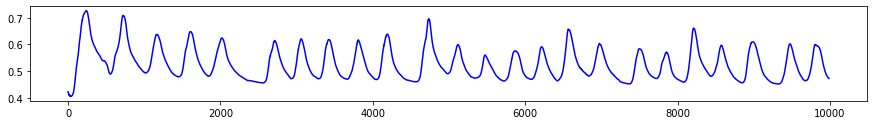

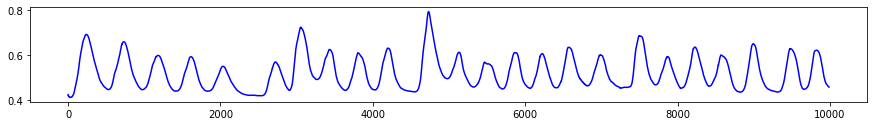

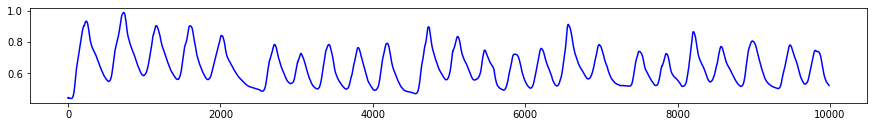

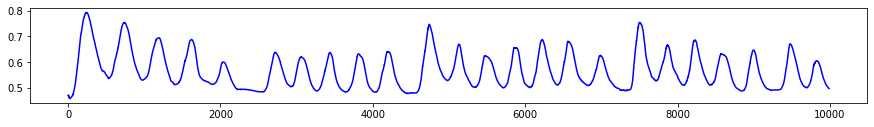

In [179]:
x = range(0, len(df_test))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df_test['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df_test['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df_test['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df_test['4'], 'b')
plt.show()

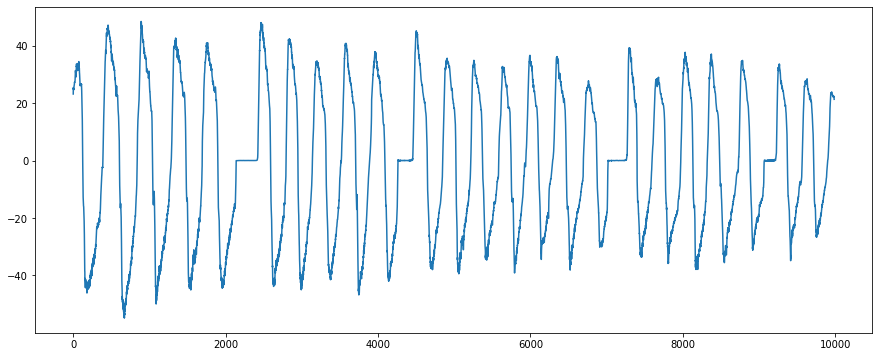

In [180]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow_test['Flow'])

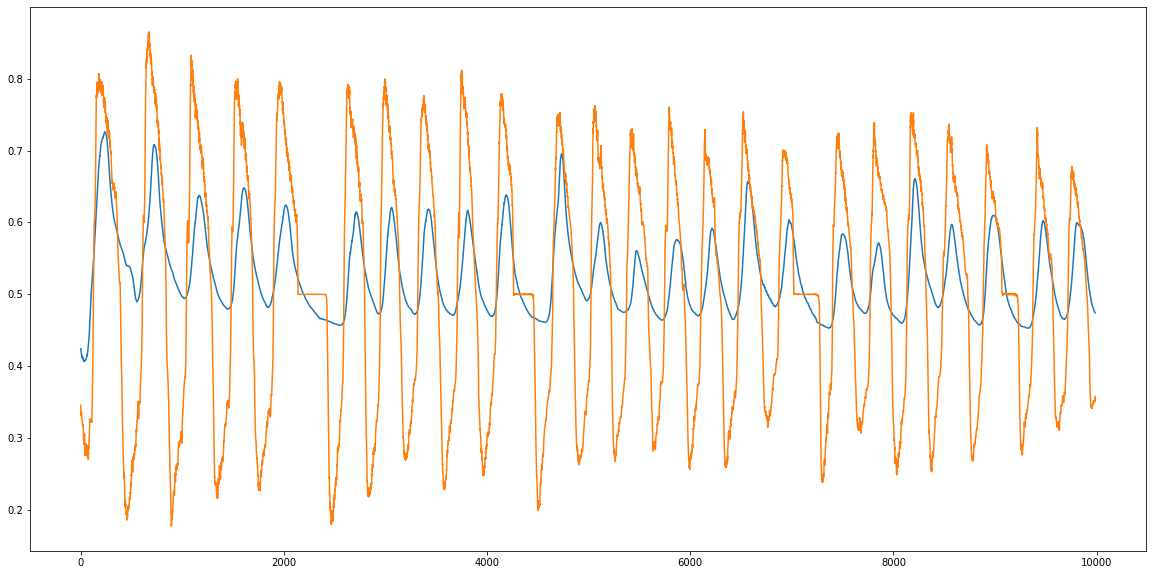

In [181]:
flow_test['a'] = (flow_test['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (20, 10))
plt.plot(x, df_test['1'], x, flow_test['a']*-1)

In [182]:
flow_test.drop('a', inplace = True, axis = 1)

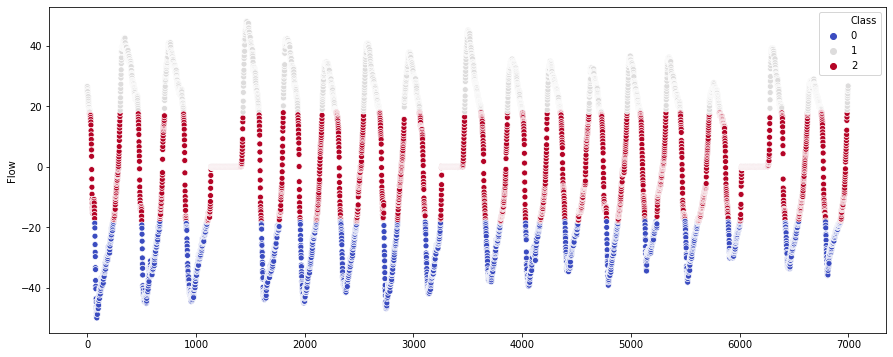

In [183]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:8000], x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

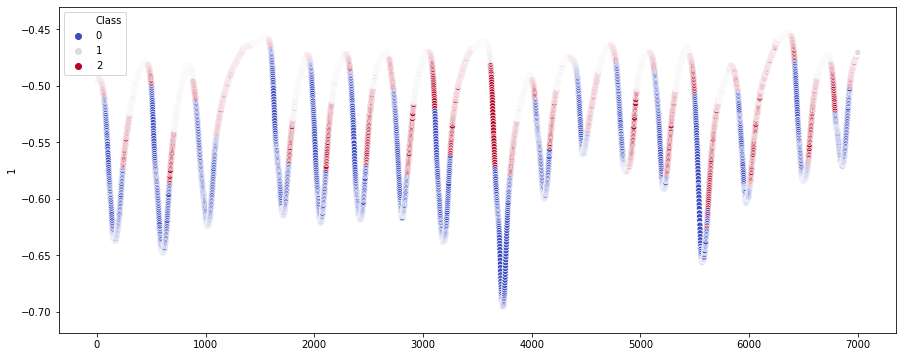

In [184]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df_test['1'][1000:8000]*-1, x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

In [185]:
test_sensors = df_test.drop('Class', axis = 1)
test_sensors.drop('hours', inplace = True, axis = 1)
test_sensors.drop('minutes', inplace = True, axis = 1)
test_sensors.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
test_class = df_test['Class']
test_class = pd.DataFrame(test_class, index = None, columns = ['Class'])

#### model testing - random forest

In [186]:
test_predictions = rf_model.predict(test_sensors)
print(" accuracy = ", accuracy_score(test_class, test_predictions))
print(confusion_matrix(test_class, test_predictions))
print("\n")

print('Random Forest - Testing')
print('\n')
print(classification_report(test_class, test_predictions))

 accuracy =  0.7039743718089899
[[2728    4  543]
 [  13 2324  899]
 [ 353 1145 1980]]


Random Forest - Testing


              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3275
           1       0.67      0.72      0.69      3236
           2       0.58      0.57      0.57      3478

    accuracy                           0.70      9989
   macro avg       0.71      0.71      0.71      9989
weighted avg       0.71      0.70      0.71      9989



In [187]:
testPredictions = classSwitch(test_predictions)
testClass = classSwitch(list(test_class['Class']))
print('Random Forest - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Random Forest - Testing


              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5801
           1       0.73      0.91      0.81      4188

    accuracy                           0.82      9989
   macro avg       0.83      0.84      0.82      9989
weighted avg       0.84      0.82      0.82      9989



### model testing - deep learning

In [188]:
test_predictions = model.predict(test_sensors)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))

print('Keras Model - Testing')
print('\n')
print(classification_report(test_class, final_pred_test))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3275
           1       0.61      0.67      0.64      3236
           2       0.50      0.49      0.50      3478

    accuracy                           0.65      9989
   macro avg       0.66      0.65      0.65      9989
weighted avg       0.65      0.65      0.65      9989



In [189]:
testPredictions = classSwitch(final_pred_test)
testClass = classSwitch(list(test_class['Class']))
print('Keras Model - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      5801
           1       0.69      0.84      0.76      4188
           2       0.00      0.00      0.00         0

    accuracy                           0.78      9989
   macro avg       0.52      0.52      0.52      9989
weighted avg       0.80      0.78      0.78      9989



/Users/mikefurr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


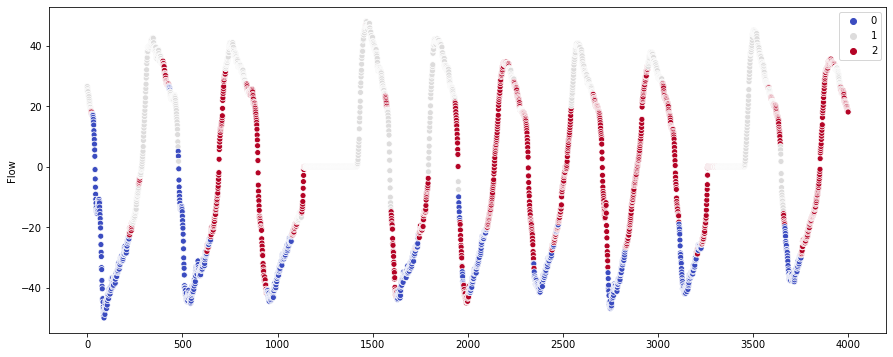

In [190]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:5000], x = range(0, 4000), hue = final_pred_test[1000:5000], palette = 'coolwarm')

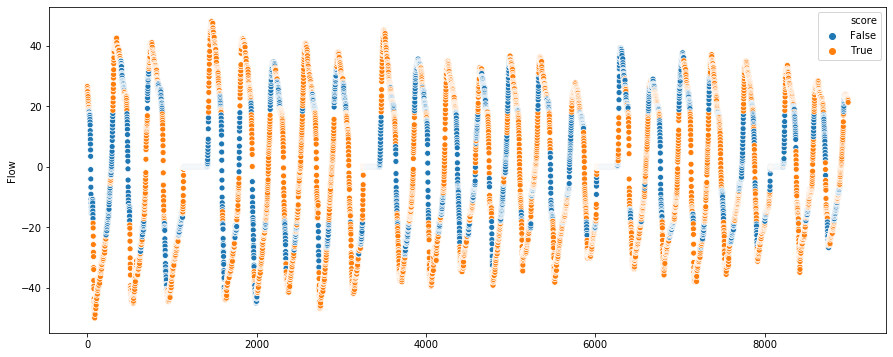

In [191]:
# Looking at where either model fails
test_class['score'] = test_class['Class'] == final_pred_test
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:], x = range(0, 8989), hue = test_class['score'][1000:])

#### Save TFLite Model

In [192]:
keras_file = "model_5.h5"
keras.models.save_model(model, keras_file)
converter = tf.lite.TocoConverter.from_keras_model_file('model_5.h5')
tflite_model = converter.convert()
open("model_5.tflite", "wb").write(tflite_model)

88296